In [1]:
library(tidyverse)
library(caret)
library(rpart)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

In [13]:
titanic_train <- read_csv("./data/train.csv")
titanic_test <- read_csv("./data/test.csv")

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)
Parsed with column specification:
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


In [14]:
str(titanic_train)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),

In [15]:
str(titanic_test)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	418 obs. of  11 variables:
 $ PassengerId: num  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : num  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : num  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : num  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  NA NA NA NA ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   SibSp = col_double(),
  ..   Parch = col_double(),
  ..   Ticket = col_character(),
  ..   Fare = co

### Check for any NAs

In [73]:
#which of the columns have NA
na_col_train <- apply(titanic_train, 2, function(x){
            any(is.na(x))
})
na_col_train

PassengerId    Survived      Pclass        Name         Sex         Age 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE       FALSE       FALSE        TRUE       FALSE

In [74]:
#indices of NA entities
na_matrix_train <- apply(titanic_train, 2, function(x){
            is.na(x)
})
na_tib_train <- na_matrix_train %>% as_tibble()
na_Age_ind_train <- which(na_tib_train$Age == TRUE)
na_Cabin_ind_train <- which(na_tib_train$Cabin == TRUE)
na_Embarked_ind_train <- which (na_tib_train$Embarked == TRUE)

In [75]:
length(na_Age_ind_train)

[1] 0

In [76]:
length(na_Cabin_ind_train)

[1] 687

In [77]:
length(na_Embarked_ind_train)

[1] 0

In [78]:
#which of the columns have NA
na_col_test <- apply(titanic_test, 2, function(x){
            any(is.na(x))
})
na_col_test

PassengerId      Pclass        Name         Sex         Age       SibSp 
      FALSE       FALSE       FALSE       FALSE        TRUE       FALSE 
      Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE        TRUE        TRUE       FALSE

In [81]:
#indices of NA entities
na_matrix_test <- apply(titanic_test, 2, function(x){
            is.na(x)
})
na_tib_test <- na_matrix_test %>% as_tibble()
na_Age_ind_test <- which(na_tib_test$Age == TRUE)
na_Fare_ind_test <- which(na_tib_test$Fare == TRUE)
na_Cabin_ind_test <- which(na_tib_test$Cabin == TRUE)

In [80]:
length(na_Age_ind_test)

[1] 86

In [82]:
length(na_Fare_ind_test)

[1] 1

In [83]:
length(na_Cabin_ind_test)

[1] 327

### Handle missing values

In [135]:
titanic_train$Age[na_Age_ind] <- titanic_train %>% filter(!is.na(Age)) %>%
    pull(Age) %>% median()

In [47]:
sum(is.na(titanic_train$Age))

[1] 0

In [54]:
titanic_train %>% .$Embarked %>% as_factor() %>% summary()

S    C    Q NA's 
 644  168   77    2

In [56]:
titanic_train$Embarked[na_Embarked_ind] <- "S" 

In [136]:
titanic_test$Age[na_Age_ind_test] <- titanic_test %>% filter(!is.na(Age)) %>%
    pull(Age) %>% median()

In [137]:
titanic_test$Fare[na_Fare_ind_test] <- titanic_test %>% filter(!is.na(Fare)) %>%
    pull(Fare) %>% median()

### Check how many percentages of females and males survived

In [86]:
titanic_train %>% group_by(Sex) %>% summarize(mean(Survived))

Sex,mean(Survived)
female,0.7420382
male,0.1889081


Gender model

In [59]:
y_hat_gender <- ifelse(titanic_test$Sex == "female", 1, 0)
pred_gender <- tibble(PassengerId = titanic_test$PassengerId,
                     Survived = y_hat_gender)
write_csv(pred_gender, "pred_gender.csv")

### Factorize train and test sets

In [139]:
titanic_train_factorized <- titanic_train %>% mutate(Survived = factor(Survived),
                                               Pclass = factor(Pclass),
                                               Sex = factor(Sex),
                                               Embarked = factor(Embarked)) %>%
                            select(Survived, Sex, Pclass, Age, SibSp, Parch, Fare, Embarked)

In [140]:
titanic_test_factorized <- titanic_test %>% mutate(Pclass = factor(Pclass),
                                               Sex = factor(Sex),
                                               Embarked = factor(Embarked)) %>%
                            select(Sex, Pclass, Age, SibSp, Parch, Fare, Embarked)

### Decision Tree with rpart

In [95]:
fit_rpart <- train(Survived ~ ., method = "rpart", tuneGrid = data.frame(cp = seq(0, 0.05, 0.001)),
                data = titanic_train_factorized)

In [97]:
fit_rpart$bestTune

,cp
13,0.012


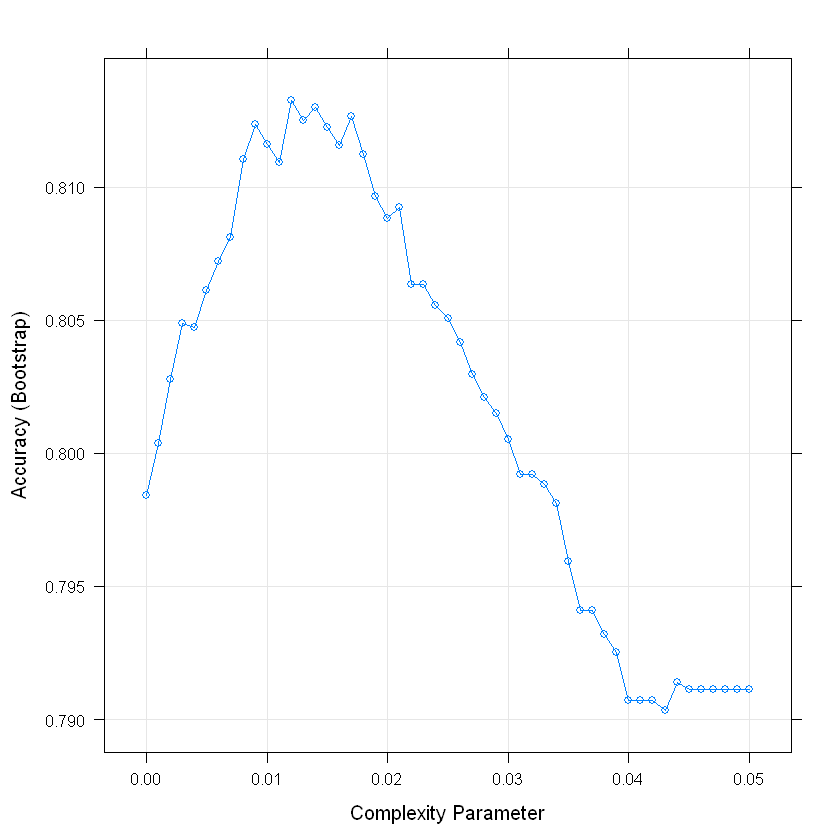

In [98]:
plot(fit_rpart)

In [99]:
y_hat_rpart <- predict(fit_rpart, titanic_test_factorized)
pred_rpart <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = y_hat_rpart)
write_csv(pred_rpart, "pred_rpart.csv")

In [100]:
varImp(fit_rpart)

rpart variable importance

          Overall
Sexmale   100.000
Pclass3    65.527
Fare       56.457
Age        19.684
SibSp      15.473
EmbarkedS  10.794
Pclass2     2.301
Parch       1.791
EmbarkedQ   0.000

In [93]:
nrow(pred_rpart)

[1] 418

rpart submission scored 0.77511

### Random Forest

In [141]:
fit_rf <- train(Survived ~ Sex + Pclass + Fare + Age + SibSp + Embarked, method = "rf", data = titanic_train_factorized,
               ntree = 1000, tuneGride = data.frame(mtry = seq(1, 6, 1)))
fit_rf$bestTune

mtry
2


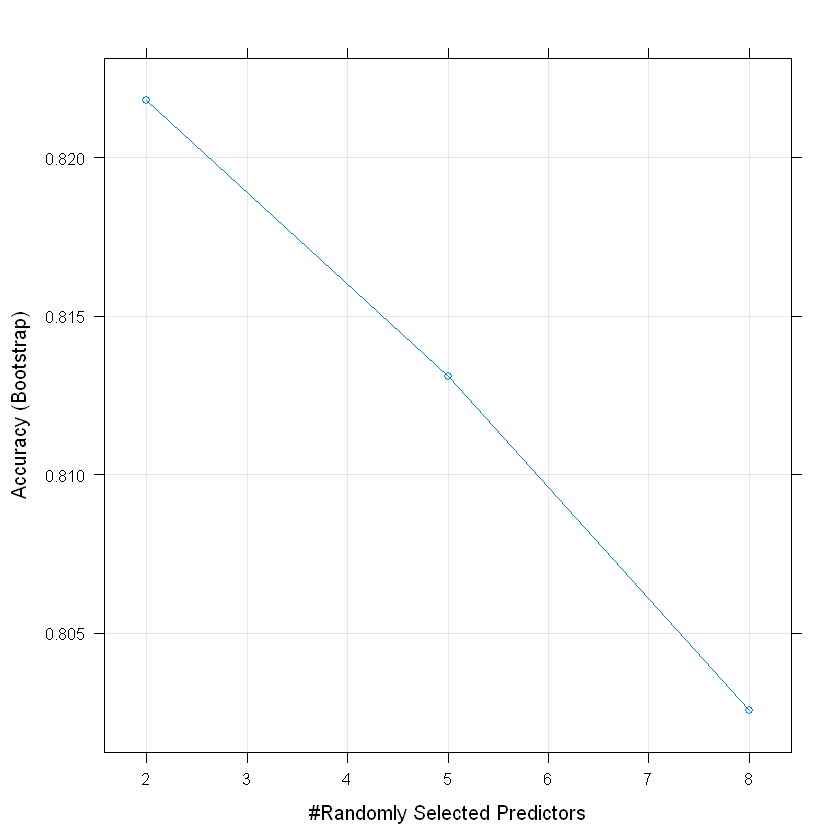

In [142]:
plot(fit_rf)

In [143]:
y_hat_rf <- predict(fit_rf, titanic_test_factorized)
pred_rf <- tibble(PassengerId = titanic_test$PassengerId,
                 Survived = y_hat_rf)
write_csv(pred_rf, "pred_rf.csv")

In [144]:
varImp(fit_rf)

rf variable importance

          Overall
Sexmale   100.000
Fare       52.294
Age        37.933
Pclass3    24.496
SibSp      11.055
EmbarkedS   3.929
Pclass2     3.351
EmbarkedQ   0.000

rf submission scored 0.78468